In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
imdb_data = pd.read_csv("../datasets/IMDb movies extensive dataset/IMDb movies.csv")

C:\Users\abanop\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
imdb_data.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [4]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
imdb_data.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [6]:
imdb_data.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [7]:
#using one feature to understand cluster better

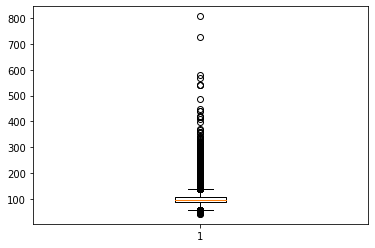

In [8]:
#best way to show that outlier is boxplot
plt.boxplot(imdb_data["duration"])
plt.show()

In [34]:
#feature=["duration"]
#using multible features
feature=["duration","votes","reviews_from_users"]
data=imdb_data[feature].copy()
data.fillna(-999,inplace=True)

In [35]:
data.isna().any()

duration              False
votes                 False
reviews_from_users    False
dtype: bool

In [36]:
data=data.values

In [37]:
data.shape

(85855, 3)

In [38]:
scaler=StandardScaler()
data=scaler.fit_transform(data)

In [39]:
data

array([[-2.45420385, -0.17432862,  0.13858782],
       [-1.34573909, -0.16620901,  0.15611908],
       [-2.09949512, -0.17369398,  0.15027533],
       ...,
       [ 1.31457632, -0.17225672, -2.78329018],
       [-0.10425856, -0.17358199, -2.78329018],
       [-1.16838473, -0.17529924, -2.78329018]])

In [41]:
#inertia_ is the distance between points and centeroid the lowest is better
#%%time
n_cluster=range(1,21)
kmeans=[KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores=[kmeans[i].score(data) for i in range(len(kmeans))]

([<matplotlib.axis.XTick at 0x1eec90f21c8>,
 <a list of 20 Text xticklabel objects>)

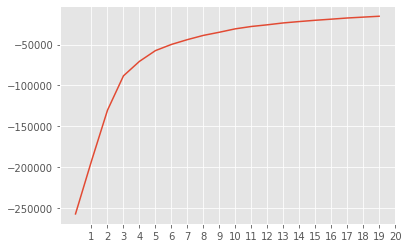

In [42]:
plt.style.use("ggplot")
plt.plot(scores)
plt.xticks(n_cluster)

In [74]:
#better way to choose number of cluster but it took more time is 
#from sklearn.metrics import silhouette_score

In [43]:
#calc the best cluster
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

16


In [44]:
pred=KMeans(n_clusters=n_clusters).fit_predict(data)

In [47]:
pred

array([5, 5, 5, ..., 9, 2, 2])

In [48]:
data=pd.DataFrame(data)
data["cluster"]=pred

In [51]:
data["cluster"].value_counts()

0     29869
6     20645
5      9543
1      8917
2      6241
7      4264
14     2158
13     1661
9      1342
4       712
3       247
15      159
10       57
12       16
8        13
11       11
Name: cluster, dtype: int64

In [52]:
outliers=[x for x in zip(data["cluster"].value_counts().iloc[-3:].index , data["cluster"].value_counts().iloc[-3:].values)]

In [53]:
outliers

[(12, 16), (8, 13), (11, 11)]

In [54]:
data

,0,1,2,cluster
0,-2.454204,-0.174329,0.138588,5
1,-1.345739,-0.166209,0.156119,5
2,-2.099495,-0.173694,0.150275,5
3,-0.015581,-0.168878,0.208713,6
4,-1.434416,-0.135448,0.226244,5
...,...,...,...,...
85850,-0.237274,-0.169774,-2.783290,2
85851,0.117434,-0.163689,0.153197,6
85852,1.314576,-0.172257,-2.783290,9
85853,-0.104259,-0.173582,-2.783290,2


In [102]:
data[data["cluster"]==11]

,0,cluster
38038,27.873392,11
85057,31.376140,11


In [55]:
imdb_data.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [106]:
#if you notice that the least cluster is also the max so you can know that is outlier
imdb_data[data["cluster"]==11]["duration"]

38038    729
85057    808
Name: duration, dtype: int64

In [108]:
data

,0,cluster
0,-2.454204,12
1,-1.345739,4
2,-2.099495,12
3,-0.015581,8
4,-1.434416,4
...,...,...
85850,-0.237274,1
85851,0.117434,8
85852,1.314576,15
85853,-0.104259,1
